Importing Dependencies

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso


Data Processing

In [39]:
#loading data into a panda dataframe
car_data = pd.read_csv('/content/car data.csv')

In [40]:
car_data.shape

(301, 9)

In [41]:
car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [ ]:
car_data.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [ ]:
#checking for missing values
car_data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [ ]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [ ]:
car_data['Fuel_Type'].value_counts()

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64

In [ ]:
car_data['Seller_Type'].value_counts()

Dealer        195
Individual    106
Name: Seller_Type, dtype: int64

In [ ]:
car_data['Transmission'].value_counts()

Manual       261
Automatic     40
Name: Transmission, dtype: int64

In [42]:
car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [44]:
car_data.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2},'Seller_Type':{'Dealer':0,'Individual':1},'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

In [45]:
car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


Splitting the dataset into question and answers

In [47]:
X = car_data.drop(columns = ['Selling_Price','Car_Name'],axis=1)
Y = car_data['Selling_Price']

In [48]:
print(X)
print(Y)

     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
0    2014           5.59       27000          0            0             0   
1    2013           9.54       43000          1            0             0   
2    2017           9.85        6900          0            0             0   
3    2011           4.15        5200          0            0             0   
4    2014           6.87       42450          1            0             0   
..    ...            ...         ...        ...          ...           ...   
296  2016          11.60       33988          1            0             0   
297  2015           5.90       60000          0            0             0   
298  2009          11.00       87934          0            0             0   
299  2017          12.50        9000          1            0             0   
300  2016           5.90        5464          0            0             0   

     Owner  
0        0  
1        0  
2        0  
3        0 

Splitting into training and test data

In [50]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size =0.2,random_state = 2)

In [51]:
print(X.shape,X_train.shape,X_test.shape)

(301, 7) (240, 7) (61, 7)


Model Training

In [52]:
lin_reg_model = LinearRegression()

In [54]:
lin_reg_model.fit(X_train,Y_train)

LinearRegression()

Model Evaluation

In [55]:
training_data_prediction = lin_reg_model.predict(X_train)

In [56]:
#R squared error
error_score = metrics.r2_score(Y_train,training_data_prediction)
print(error_score)

0.8838169193709796


Visualize the actual and predicted prices

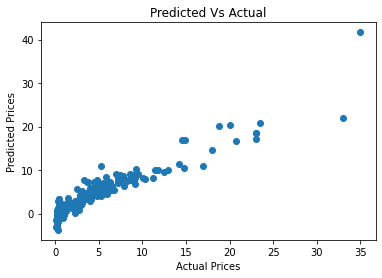

In [57]:
plt.scatter(Y_train,training_data_prediction)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Predicted Vs Actual')
plt.show()

In [58]:
test_data_prediction = lin_reg_model.predict(X_test)

In [59]:
#R squared error
error_score = metrics.r2_score(Y_test,test_data_prediction)
print(error_score)

0.8401532365377697


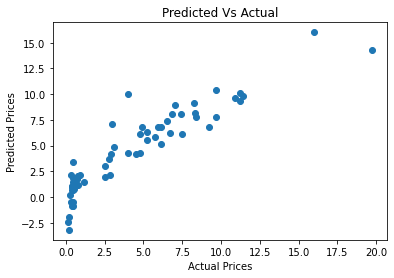

In [60]:
plt.scatter(Y_test,test_data_prediction)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Predicted Vs Actual')
plt.show()

Lasso Regression

In [62]:
lasso_reg_model = Lasso()

In [63]:
lasso_reg_model.fit(X_train,Y_train)

Lasso()

Model Evaluation

In [64]:
training_data_prediction = lasso_reg_model.predict(X_train)

In [65]:
#R squared error
error_score = metrics.r2_score(Y_train,training_data_prediction)
print(error_score)

0.843587395258283


Visualize the actual and predicted prices

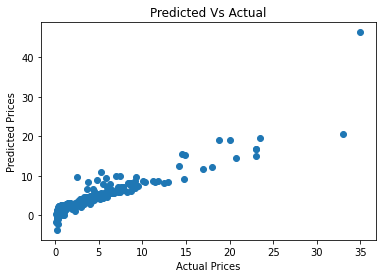

In [66]:
plt.scatter(Y_train,training_data_prediction)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Predicted Vs Actual')
plt.show()

In [67]:
test_data_prediction = lasso_reg_model.predict(X_test)

In [68]:
#R squared error
error_score = metrics.r2_score(Y_test,test_data_prediction)
print(error_score)

0.8497457570738539


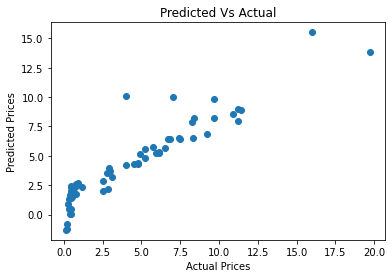

In [69]:
plt.scatter(Y_test,test_data_prediction)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Predicted Vs Actual')
plt.show()

Making a predictive system

In [71]:
input_data = (2017      ,    12.50,        9000,          1,            0,             0,0)
input_data_as_numpy_array = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
prediction = lasso_reg_model.predict(input_data_reshaped)
print(prediction)

[8.4699752]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  "X does not have valid feature names, but"
